# Proyek KASDD Ganjil 2023/24 : Valorant Pro Matches
**Nama Kelompok**: STKPlusSatu

| Nama                          | NPM         | Kelas |
|-------------------------------|-------------|-------|
| Kevin Alexander               | 2106705026  | B     |
| Emir Shamsuddin Fadhlurrahman | 2106632541  | F     |
| Michael Christlambert Sinanta | 2106750414  | F     |
| Vinsen Wijaya                 | 2106637776  | F     |


# Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

from xgboost import XGBClassifier

# Data Preprocessing

In [ ]:
df = pd.read_csv('./final_dataset.csv')
df_encode = pd.read_csv('./agent_encode.csv')

In [ ]:
df_final = pd.merge(df, df_encode, on='Agent', how='left')
df_final.drop(columns=['Agent', 'Unnamed: 0', 'ACS'], inplace=True)
df_final.rename(columns={'Encode': 'AgentEncoded'}, inplace=True)

In [ ]:
df_final.head()

,GameID,PlayerID,PlayerName,TeamAbbreviation,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,...,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore,AgentEncoded
0,60894,8419.0,Reduxx,Boos,24.0,10.0,3.0,14.0,195.0,31.0,...,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1,0
1,60894,466.0,ChurmZ,Boos,16.0,10.0,7.0,6.0,161.0,16.0,...,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1,10
2,60894,3712.0,diaamond,Boos,17.0,9.0,8.0,8.0,148.0,27.0,...,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1,1
3,60894,5099.0,Boltzy,Boos,17.0,12.0,2.0,5.0,141.0,19.0,...,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1,7
4,60894,3983.0,Virtyy,Boos,5.0,13.0,3.0,-8.0,55.0,22.0,...,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1,5


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108250 entries, 0 to 108249
Data columns (total 50 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GameID             108250 non-null  int64  
 1   PlayerID           108250 non-null  float64
 2   PlayerName         108250 non-null  object 
 3   TeamAbbreviation   108250 non-null  object 
 4   Kills              108250 non-null  float64
 5   Deaths             108250 non-null  float64
 6   Assists            108250 non-null  float64
 7   PlusMinus          108250 non-null  float64
 8   ADR                108250 non-null  float64
 9   HS_Percent         108250 non-null  float64
 10  FirstKills         108250 non-null  float64
 11  FirstDeaths        108250 non-null  float64
 12  FKFD_PlusMinus     108250 non-null  float64
 13  Num_2Ks            108250 non-null  float64
 14  Num_3Ks            108250 non-null  float64
 15  Num_4Ks            108250 non-null  float64
 16  Nu

In [ ]:
df_for_correlation = pd.concat([df_final.drop('AgentEncoded', axis=1), df_final['AgentEncoded']], axis=1)
correlation_matrix = df_for_correlation.corr()
target_correlation = correlation_matrix['AgentEncoded'].drop('AgentEncoded').abs()
target_correlation.sort_values(ascending=False)

<ipython-input-63-219a12b45379>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_for_correlation.corr()


GameID               0.221821
EventID              0.218072
MatchID              0.215912
Patch                0.198414
Team2ID              0.145477
Team1ID              0.120366
Plants               0.093230
FirstKills           0.084458
Econ                 0.082755
PlayerID             0.076499
FKFD_PlusMinus       0.069006
PlusMinus            0.058441
ADR                  0.058302
Assists              0.053646
Kills                0.039397
Deaths               0.039237
Num_2Ks              0.026402
Defuses              0.023766
OnevOne              0.021817
Num_3Ks              0.021743
OnevTwo              0.019915
HS_Percent           0.018986
Num_4Ks              0.018076
Team1_MapScore       0.012734
Num_5Ks              0.009079
Team2_Eco            0.008194
Team2_SemiBuy        0.007816
OnevThree            0.005883
OnevFour             0.005112
Team1_Eco            0.004893
Team1_SemiBuy        0.003512
Team2_TotalRounds    0.003027
Team1_SemiEco        0.002629
Team2_Semi

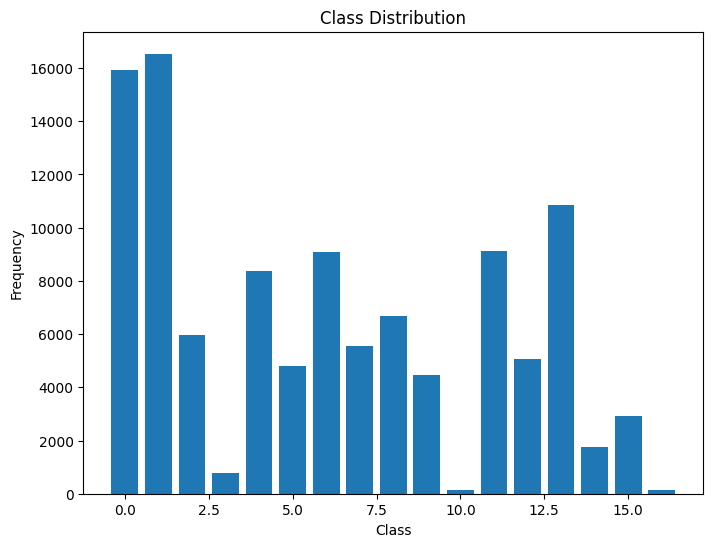

Class Frequencies:
 1     16539
0     15936
13    10845
11     9118
6      9089
4      8382
8      6684
2      5974
7      5564
12     5053
5      4812
9      4469
15     2938
14     1761
3       786
10      151
16      149
Name: AgentEncoded, dtype: int64

Class Proportions:
 1     0.152785
0     0.147215
13    0.100185
11    0.084231
6     0.083963
4     0.077432
8     0.061746
2     0.055187
7     0.051400
12    0.046679
5     0.044453
9     0.041284
15    0.027141
14    0.016268
3     0.007261
10    0.001395
16    0.001376
Name: AgentEncoded, dtype: float64

Imbalance Ratio: 111.0


In [ ]:
target_column = 'AgentEncoded'

class_frequencies = df_final[target_column].value_counts()

class_proportions = df_final[target_column].value_counts(normalize=True)

imbalance_ratio = class_frequencies.max() / class_frequencies.min()

plt.figure(figsize=(8, 6))
plt.bar(class_frequencies.index, class_frequencies.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

print("Class Frequencies:\n", class_frequencies)
print("\nClass Proportions:\n", class_proportions)
print("\nImbalance Ratio:", imbalance_ratio)

In [ ]:
df_final = pd.get_dummies(df_final, columns=['Map'], drop_first=True)
df_final.drop(columns=['PlayerName', 'TeamAbbreviation', 'Team1', 'Team2', 'Date', 'EventName', 'EventStage'], inplace=True)

# Modelling

In [ ]:
X = df_final.drop('AgentEncoded', axis=1)
y = df_final['AgentEncoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify=y)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from IPython.display import display

def ml_model(X_train, X_test, y_train, y_test):
  MLA = [
      LogisticRegression(max_iter=5000),
      KNeighborsClassifier(),
      DecisionTreeClassifier(),
      RandomForestClassifier(n_estimators=100, random_state=123),
      GaussianNB(),
      MLPClassifier(alpha=1, max_iter=1000, random_state=42),
      AdaBoostClassifier(random_state=42),
      XGBClassifier()
]

  MLA_columns = ['Algorithm', 'Accuracy', 'F1 Macro', 'F1 Micro', 'Precision Macro', 'Precision Micro', 'Recall Macro', 'Recall Micro']
  MLA_compare = pd.DataFrame(columns=MLA_columns)

  row_index = 0
  for alg in MLA:
      alg_name = alg.__class__.__name__
      alg.fit(X_train, y_train)
      prediction = alg.predict(X_test)

      MLA_compare.loc[row_index, 'Algorithm'] = alg_name
      MLA_compare.loc[row_index, 'Accuracy'] = accuracy_score(y_test, prediction)
      MLA_compare.loc[row_index, 'F1 Macro'] = f1_score(y_test, prediction, average='macro')
      MLA_compare.loc[row_index, 'F1 Micro'] = f1_score(y_test, prediction, average='micro')
      MLA_compare.loc[row_index, 'Precision Macro'] = precision_score(y_test, prediction, average='macro', zero_division=0)
      MLA_compare.loc[row_index, 'Precision Micro'] = precision_score(y_test, prediction, average='micro', zero_division=0)
      MLA_compare.loc[row_index, 'Recall Macro'] = recall_score(y_test, prediction, average='macro', zero_division=0)
      MLA_compare.loc[row_index, 'Recall Micro'] = recall_score(y_test, prediction, average='micro', zero_division=0)

      row_index += 1

  display(MLA_compare)

In [ ]:
ml_model(X_train, X_test, y_train, y_test)

,Algorithm,Accuracy,F1 Macro,F1 Micro,Precision Macro,Precision Micro,Recall Macro,Recall Micro
0,LogisticRegression,0.384326,0.256025,0.384326,0.309499,0.384326,0.252183,0.384326
1,KNeighborsClassifier,0.23067,0.135312,0.23067,0.154701,0.23067,0.13547,0.23067
2,DecisionTreeClassifier,0.232363,0.164627,0.232363,0.164997,0.232363,0.164351,0.232363
3,RandomForestClassifier,0.351347,0.201022,0.351347,0.246151,0.351347,0.205284,0.351347
4,GaussianNB,0.059985,0.05534,0.059985,0.241717,0.059985,0.193658,0.059985
5,MLPClassifier,0.390947,0.23503,0.390947,0.275803,0.390947,0.238714,0.390947
6,AdaBoostClassifier,0.288868,0.171098,0.288868,0.217414,0.288868,0.181834,0.288868
7,XGBClassifier,0.421955,0.301455,0.421955,0.362506,0.421955,0.288359,0.421955


In [ ]:
oversample = SMOTE(sampling_strategy='minority')
X_train1, y_train1 = oversample.fit_resample(X_train, y_train)

In [ ]:
ml_model(X_train1, X_test, y_train1, y_test)

,Algorithm,Accuracy,F1 Macro,F1 Micro,Precision Macro,Precision Micro,Recall Macro,Recall Micro
0,LogisticRegression,0.35418,0.249087,0.35418,0.315958,0.35418,0.254724,0.35418
1,KNeighborsClassifier,0.225065,0.134229,0.225065,0.155555,0.225065,0.136123,0.225065
2,DecisionTreeClassifier,0.23184,0.164168,0.23184,0.164387,0.23184,0.164019,0.23184
3,RandomForestClassifier,0.348483,0.200005,0.348483,0.25941,0.348483,0.203592,0.348483
4,GaussianNB,0.06756,0.065598,0.06756,0.216929,0.06756,0.190696,0.06756
5,MLPClassifier,0.37746,0.234458,0.37746,0.310065,0.37746,0.241988,0.37746
6,AdaBoostClassifier,0.204619,0.082176,0.204619,0.108741,0.204619,0.16233,0.204619
7,XGBClassifier,0.420354,0.298803,0.420354,0.354303,0.420354,0.286448,0.420354


In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train2, y_train2 = undersample.fit_resample(X_train, y_train)

In [ ]:
ml_model(X_train2, X_test, y_train2, y_test)

,Algorithm,Accuracy,F1 Macro,F1 Micro,Precision Macro,Precision Micro,Recall Macro,Recall Micro
0,LogisticRegression,0.343464,0.244133,0.343464,0.316122,0.343464,0.264833,0.343464
1,KNeighborsClassifier,0.204711,0.132595,0.204711,0.152072,0.204711,0.143882,0.204711
2,DecisionTreeClassifier,0.210192,0.158064,0.210192,0.167139,0.210192,0.172697,0.210192
3,RandomForestClassifier,0.316151,0.198923,0.316151,0.22626,0.316151,0.225244,0.316151
4,GaussianNB,0.172009,0.053469,0.172009,0.209472,0.172009,0.137614,0.172009
5,MLPClassifier,0.346913,0.217424,0.346913,0.275899,0.346913,0.245768,0.346913
6,AdaBoostClassifier,0.254534,0.154987,0.254534,0.182004,0.254534,0.228859,0.254534
7,XGBClassifier,0.371794,0.277307,0.371794,0.28861,0.371794,0.294741,0.371794


In [ ]:
resampling_techniques = [
    ('RandomUnderSampler', RandomUnderSampler(sampling_strategy='majority')),
    ('NearMiss', NearMiss()),
    ('NearMissV2', NearMiss(version=2)),
    ('NearMissV3', NearMiss(version=3)),
    ('TomekLinks', TomekLinks()),
    ('RandomOverSampler', RandomOverSampler(sampling_strategy='minority')),
    ('SMOTE', SMOTE()),
    ('BorderlineSMOTE', BorderlineSMOTE())
]

classifier = XGBClassifier()

MLA_columns = ['Algorithm', 'Accuracy', 'F1 Macro', 'F1 Micro', 'Precision Macro', 'Precision Micro', 'Recall Macro', 'Recall Micro']
MLA_compare = pd.DataFrame(columns=MLA_columns)

row_index = 0
for name, sampler in resampling_techniques:
    steps = [('under', sampler), ('model', classifier)]
    pipeline = Pipeline(steps=steps)

    pipeline.fit(X_train, y_train)

    prediction = pipeline.predict(X_test)

    MLA_compare.loc[row_index, 'Algorithm'] = name
    MLA_compare.loc[row_index, 'Accuracy'] = accuracy_score(y_test, prediction)
    MLA_compare.loc[row_index, 'F1 Macro'] = f1_score(y_test, prediction, average='macro')
    MLA_compare.loc[row_index, 'F1 Micro'] = f1_score(y_test, prediction, average='micro')
    MLA_compare.loc[row_index, 'Precision Macro'] = precision_score(y_test, prediction, average='macro', zero_division=0)
    MLA_compare.loc[row_index, 'Precision Micro'] = precision_score(y_test, prediction, average='micro', zero_division=0)
    MLA_compare.loc[row_index, 'Recall Macro'] = recall_score(y_test, prediction, average='macro', zero_division=0)
    MLA_compare.loc[row_index, 'Recall Micro'] = recall_score(y_test, prediction, average='micro', zero_division=0)

    row_index += 1

display(MLA_compare)

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


,Algorithm,Accuracy,F1 Macro,F1 Micro,Precision Macro,Precision Micro,Recall Macro,Recall Micro
0,RandomUnderSampler,0.37438,0.28166,0.37438,0.351737,0.37438,0.298317,0.37438
1,NearMiss,0.075597,0.085191,0.075597,0.154913,0.075597,0.212977,0.075597
2,NearMissV2,0.066605,0.081755,0.066605,0.183439,0.066605,0.187319,0.066605
3,NearMissV3,0.164742,0.144705,0.164742,0.16471,0.164742,0.241084,0.164742
4,TomekLinks,0.407667,0.277583,0.407667,0.318386,0.407667,0.269606,0.407667
5,RandomOverSampler,0.416844,0.296851,0.416844,0.351644,0.416844,0.284629,0.416844
6,SMOTE,0.392517,0.281763,0.392517,0.297514,0.392517,0.276201,0.392517
7,BorderlineSMOTE,0.391778,0.282265,0.391778,0.295028,0.391778,0.277371,0.391778


In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
xgbc = XGBClassifier(
    learning_rate=0.1,
    n_estimators=5000,
    gamma=0.4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    seed=27,
    max_depth=3,
    min_child_weight=5
)

oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

xgbc.fit(X_train_over, y_train_over)
y_pred = xgbc.predict(X_test)
evaluate_classifier_performance(y_test, y_pred)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.67      0.54      0.60      5957
           1       0.58      0.45      0.51      6337
           2       0.42      0.38      0.40      1989
           3       0.14      0.29      0.18       112
           4       0.40      0.40      0.40      2484
           5       0.22      0.31      0.26      1032
           6       0.36      0.38      0.37      2536
           7       0.31      0.37      0.34      1381
           8       0.40      0.51      0.45      1602
           9       0.19      0.36      0.25       695
          10       0.20      0.45      0.28        20
          11       0.51      0.48      0.50      2910
          12       0.38      0.48      0.42      1210
          13       0.40      0.38      0.39      3460
          14       0.10      0.23      0.14       231
          15       0.15      0.28      0.20       475
          16       0.07      0

prediction,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
actual,,,,,,,,,,,,,,,,,
0,3225,175,64,17,298,133,260,132,93,474,17,539,30,238,33,218,11
1,148,2882,299,59,332,260,347,397,264,99,6,141,261,589,132,118,3
2,40,215,749,40,117,201,90,84,138,19,2,27,93,127,27,18,2
3,7,12,16,32,0,5,5,12,5,0,0,2,7,6,3,0,0
4,184,242,118,5,1003,75,188,89,92,66,4,174,32,154,18,39,1
5,50,102,131,16,35,320,63,111,45,16,1,26,40,44,16,14,2
6,208,203,64,4,160,73,976,46,69,87,3,111,116,288,48,77,3
7,70,242,64,14,70,84,58,513,96,35,2,41,16,33,35,3,5
8,24,125,96,8,43,79,41,97,812,22,1,40,79,102,20,11,2




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.4387682832948422
F1 Macro Average: 0.33816437869858323
F1 Micro Average: 0.4387682832948422
Precision Macro Average: 0.32369466620512244
Precision Micro Average: 0.4387682832948422
Recall Macro Average: 0.37459813127580505
Recall Micro Average: 0.4387682832948422



# Data Prediction

In [ ]:
df_scores_test = pd.read_csv('./scores_test.csv')
df_games_test = pd.read_csv('./games_test.csv')
df_matches_test = pd.read_csv('./matches_test.csv')

df_scores_test_processed = df_scores_test.drop(['KAST_Percent', 'No'], axis=1)
df_games_test_processed = df_games_test.drop(['No'], axis=1)
df_matches_test_processed = df_matches_test.drop(['No'], axis=1)
df_matches_test_processed['Patch'] = df_matches_test_processed['Patch'].str.extract(r'(\d)\.\d+').astype(float)
df_test_merged_1 = pd.merge(df_scores_test_processed, df_games_test_processed, on='GameID', how='left')
df_test_merged_final = pd.merge(df_test_merged_1, df_matches_test_processed, on='MatchID', how='left')
df_test_merged_final = pd.get_dummies(df_test_merged_final, columns=['Map'], drop_first=True)

col_to_drop = ['Team1ID_x', 'Team2ID_x', 'Team1_x', 'Team2_x']
df_test_merged_final.drop(col_to_drop, axis=1, inplace=True)
df_test_merged_final.rename(columns={'Team1ID_y': 'Team1ID', 'Team2ID_y': 'Team2ID', 'Team1_y': 'Team1', 'Team2_y': 'Team2'}, inplace=True)

In [ ]:
X_test = df_test_merged_final[df_final.drop(['AgentEncoded'], axis=1).columns]

X_test_scaled = scaler.transform(X_test)

y_test_pred = xgbc.predict(X_test_scaled)

submission = pd.DataFrame({
    'No': df_scores_test['No'],
    'Agent': y_test_pred
})

submission.head()

,No,Agent
0,100,2
1,101,2
2,102,2
3,103,2
4,104,4


In [ ]:
submission.to_csv('classify.csv', index=False)